Hackerrank '15 days of SQL' output as a dataframe

In [2]:
import os 
import pandas as pd

pwd = os.getcwd()
df = pd.read_csv(pwd+"/15 Days.csv")


Check what kind of monstrosity the copy pasted file produced

In [3]:
df.head()

,day amount id name
0,2016-03-01 112 8131 Denise
1,2016-03-02 59 39091 Ruby
2,2016-03-03 51 18105 Roy
3,2016-03-04 49 533 Patrick
4,2016-03-05 49 7891 Stephanie


Some fixes

In [4]:
df[['day', 'amount', 'id', 'name']] = df['day amount id name'].str.split(" ", expand=True)
df.head()

,day amount id name,day,amount,id,name
0,2016-03-01 112 8131 Denise,2016-03-01,112,8131,Denise
1,2016-03-02 59 39091 Ruby,2016-03-02,59,39091,Ruby
2,2016-03-03 51 18105 Roy,2016-03-03,51,18105,Roy
3,2016-03-04 49 533 Patrick,2016-03-04,49,533,Patrick
4,2016-03-05 49 7891 Stephanie,2016-03-05,49,7891,Stephanie


Remove original column

In [5]:
df = df.drop('day amount id name', axis=1)
df.head()

,day,amount,id,name
0,2016-03-01,112,8131,Denise
1,2016-03-02,59,39091,Ruby
2,2016-03-03,51,18105,Roy
3,2016-03-04,49,533,Patrick
4,2016-03-05,49,7891,Stephanie


Save fixes to new csv

In [27]:
df.to_csv('15_days_fixed.csv', index=False)

Reload fixed csv

In [6]:
df = pd.read_csv(pwd+"/15_days_fixed.csv", parse_dates=['day'])
df.head()

,day,amount,id,name
0,2016-03-01,112,8131,Denise
1,2016-03-02,59,39091,Ruby
2,2016-03-03,51,18105,Roy
3,2016-03-04,49,533,Patrick
4,2016-03-05,49,7891,Stephanie


Plot some stuff

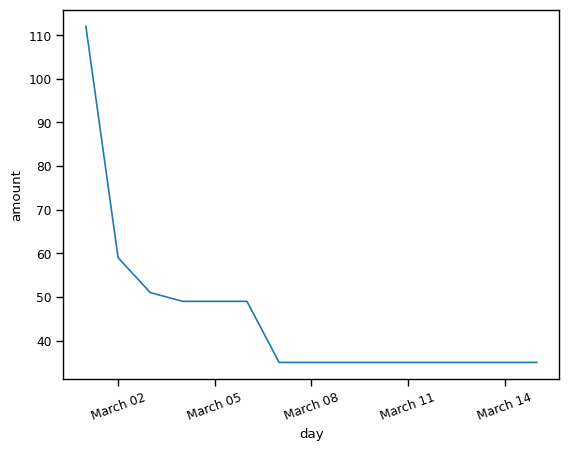

In [29]:
import matplotlib.pyplot as plt 
from matplotlib.dates import DayLocator, DateFormatter
import seaborn as sns

fig, ax = plt.subplots()

sns.set_context("paper")
sns.lineplot(data=df, ax=ax, x='day', y='amount')
ax.xaxis.set_major_locator(DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%B %d'))
#ax.set_ylim(25,120)
_ = plt.xticks(rotation=20)